In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import sys
sys.path.insert(0, 'C:/Users/ander/Repositorios/val-metodos-analiticos/funcs')
import functions
import random

In [2]:
small_dose = np.array([
    4.2, 11.5, 7.3, 5.8, 6.4, 10, 11.2, 11.2, 5.2, 7,
    15.2, 21.5, 17.6, 9.7, 14.5, 10, 8.2, 9.4, 16.5, 9.7
])
medium_dose = np.array([
    16.5, 16.5, 15.2, 17.3, 22.5, 17.3, 13.6, 14.5, 18.8, 15.5,
    19.7, 23.3, 23.6, 26.4, 20, 25.2, 25.8, 21.2, 14.5, 27.3
])
large_dose = np.array([
    23.6, 18.5, 33.9, 25.5, 26.4, 32.5, 26.7, 21.5, 23.3, 29.5,
    25.5, 26.4, 22.4, 24.5, 24.8, 30.9, 26.4, 27.3, 29.4, 23
])

df = pd.DataFrame({
    "small_dose": small_dose,
    "medium_dose": medium_dose,
    "large_dose": large_dose,
})

alpha = 0.05

In [3]:
df.describe()

,small_dose,medium_dose,large_dose
count,20.000000,20.000000,20.00000
mean,10.605000,19.735000,26.10000
std,4.499763,4.415436,3.77415
min,4.200000,13.600000,18.50000
25%,7.225000,16.250000,23.52500
50%,9.850000,19.250000,25.95000
75%,12.250000,23.375000,27.82500
max,21.500000,27.300000,33.90000


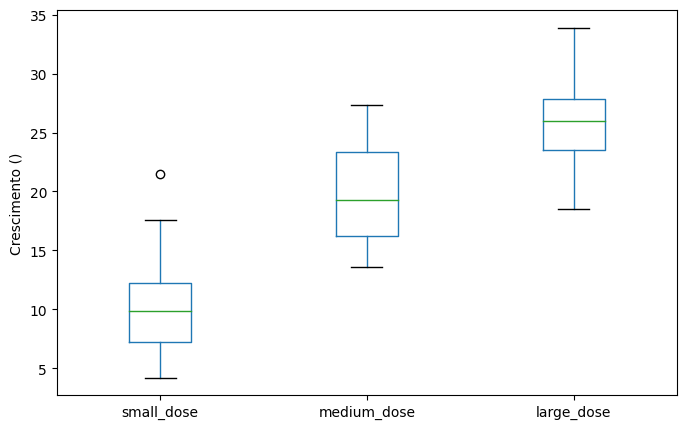

In [4]:
fig, ax = plt.subplots(figsize=(8,5))
df.boxplot(grid=False, ax=ax)
ax.set_ylabel("Crescimento ()")

plt.show()

In [5]:
levene = stats.levene(small_dose, medium_dose, large_dose)
levene

LeveneResult(statistic=0.6457341109631506, pvalue=0.5280694573759905)

In [6]:
if levene.pvalue < alpha:
    print("Variâncias não homogêneas")
else:
    print("Variâncias homogêneas")

Variâncias homogêneas


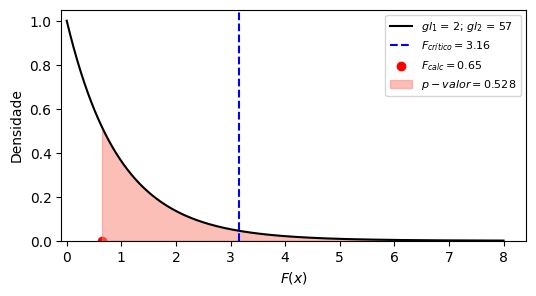

In [7]:
functions.make_f_distribution_plot(levene.statistic, levene.pvalue, gl_numerator=df.shape[1]-1, gl_denominator=df.shape[0]*df.shape[1] - df.shape[1], alpha=alpha)